# Pandas

Let's go back to the very first problem from this morning. We have an incomplete record of Newark temperatures since 1893.

In [3]:
import numpy
temperatures = numpy.loadtxt("data/newark-temperature-avg.txt")
temperatures

array([nan, nan, nan, ..., 68., 59., 47.])

But instead of analyzing it with raw Numpy, let's use Pandas.

In [4]:
import pandas
temperatures = pandas.Series(temperatures)
temperatures

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23        NaN
24        NaN
25        NaN
26        NaN
27        NaN
28        NaN
29        NaN
         ... 
41989    65.0
41990    71.0
41991    69.0
41992    70.0
41993    73.0
41994    73.0
41995    63.0
41996    52.0
41997    51.0
41998    58.0
41999    56.0
42000    52.0
42001    48.0
42002    47.0
42003    56.0
42004     NaN
42005    43.0
42006    53.0
42007    50.0
42008    46.0
42009    43.0
42010    47.0
42011    49.0
42012    52.0
42013    48.0
42014    52.0
42015    62.0
42016    68.0
42017    59.0
42018    47.0
Length: 42019, dtype: float64

Numpy was designed to do fast calculations with minimal dependencies.

Pandas was designed to make a data analyst's life easier.

In [7]:
%matplotlib inline

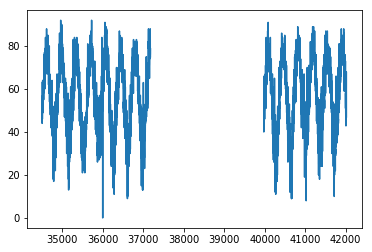

In [8]:
temperatures.plot()

Behold the turning of the seasons!

You can think of a Pandas Series as a Numpy array with bells and whistles, but it's more than that.

It is an _indexed_ Numpy array with bells and whistles.

In [9]:
temperatures.index

RangeIndex(start=0, stop=42019, step=1)

In [26]:
temperatures.index = numpy.loadtxt("data/newark-days-ago.txt")
temperatures.index.name = "days ago"

In [27]:
temperatures.index

Float64Index([-45962.0, -45961.0, -45960.0, -45959.0, -45958.0, -45957.0,
              -45956.0, -45955.0, -45954.0, -45953.0,
              ...
                  -9.0,     -8.0,     -7.0,     -6.0,     -5.0,     -4.0,
                  -3.0,     -2.0,     -1.0,      0.0],
             dtype='float64', name='days ago', length=42019)

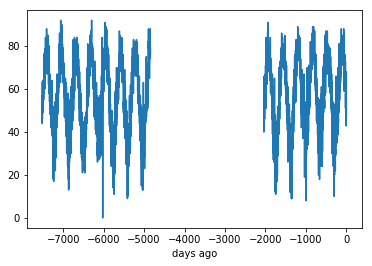

In [28]:
temperatures.plot()

In [29]:
temperatures.index = pandas.to_datetime(temperatures.index, unit="D", origin=pandas.Timestamp("2018-11-04"))
temperatures.index.name = "date"
temperatures.index

DatetimeIndex(['1893-01-01', '1893-01-02', '1893-01-03', '1893-01-04',
               '1893-01-05', '1893-01-06', '1893-01-07', '1893-01-08',
               '1893-01-09', '1893-01-10',
               ...
               '2018-10-26', '2018-10-27', '2018-10-28', '2018-10-29',
               '2018-10-30', '2018-10-31', '2018-11-01', '2018-11-02',
               '2018-11-03', '2018-11-04'],
              dtype='datetime64[ns]', name='date', length=42019, freq=None)

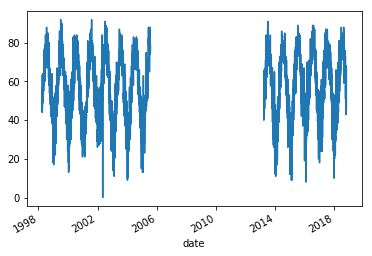

In [30]:
temperatures.plot()

Now let's return to the problem of imputing the missing temperature data.

In [31]:
min_temperatures = pandas.Series(numpy.loadtxt("data/newark-temperature-min.txt"))
max_temperatures = pandas.Series(numpy.loadtxt("data/newark-temperature-max.txt"))
min_temperatures.index = temperatures.index
max_temperatures.index = temperatures.index

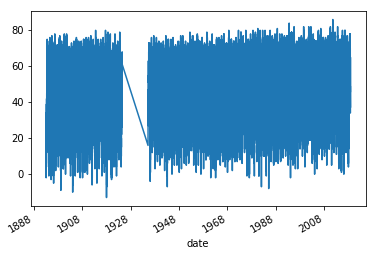

In [32]:
min_temperatures.plot()

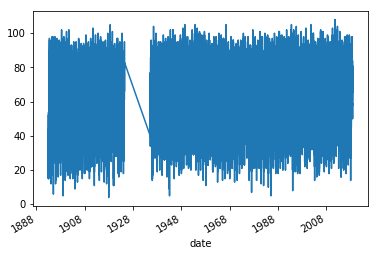

In [33]:
max_temperatures.plot()

It would be more convenient if these were in the same object. A DataFrame is several Series glued together with a common index.

In [47]:
df = pandas.concat([temperatures, min_temperatures, max_temperatures], axis="columns")
df.columns = ["avg", "min", "max"]   # name them!
df

,avg,min,max
date,,,
1893-01-01,NaN,26.0,52.0
1893-01-02,NaN,34.0,43.0
1893-01-03,NaN,17.0,32.0
1893-01-04,NaN,13.0,23.0
1893-01-05,NaN,17.0,27.0
1893-01-06,NaN,13.0,30.0
1893-01-07,NaN,12.0,28.0
1893-01-08,NaN,15.0,28.0
1893-01-09,NaN,11.0,32.0


Performing calculations on columns of a DataFrame is very much like Numpy: all of the elementwise operations, masking, and fancy indexing apply. In fact, Pandas usually just passes off this work on Numpy. However, it _organizes_ that work.

In [48]:
df["min-max avg"] = (minmax_frame["min"] + minmax_frame["max"]) / 2
df

,avg,min,max,min-max avg
date,,,,
1893-01-01,NaN,26.0,52.0,39.0
1893-01-02,NaN,34.0,43.0,38.5
1893-01-03,NaN,17.0,32.0,24.5
1893-01-04,NaN,13.0,23.0,18.0
1893-01-05,NaN,17.0,27.0,22.0
1893-01-06,NaN,13.0,30.0,21.5
1893-01-07,NaN,12.0,28.0,20.0
1893-01-08,NaN,15.0,28.0,21.5
1893-01-09,NaN,11.0,32.0,21.5


Although we could have repeated the Numpy method of masking by `numpy.isnan(df["avg"])`, Pandas has functions for dealing with missing data. (A lot of them, actually.)

In [50]:
df["imputed"] = df["avg"].fillna(df["min-max avg"])
df

,avg,min,max,min-max avg,imputed
date,,,,,
1893-01-01,NaN,26.0,52.0,39.0,39.0
1893-01-02,NaN,34.0,43.0,38.5,38.5
1893-01-03,NaN,17.0,32.0,24.5,24.5
1893-01-04,NaN,13.0,23.0,18.0,18.0
1893-01-05,NaN,17.0,27.0,22.0,22.0
1893-01-06,NaN,13.0,30.0,21.5,21.5
1893-01-07,NaN,12.0,28.0,20.0,20.0
1893-01-08,NaN,15.0,28.0,21.5,21.5
1893-01-09,NaN,11.0,32.0,21.5,21.5


We can select columns by strings in square brackets (like Numpy's record arrays, a feature I didn't show you), but rows cannot be selected by integer index.

Whereas an array of length `N` is a function `[0, N) → V`, a DataFrame is a function `K → V1×V2×V3`, where `K` is the index and `V1×V2×V3` are the columns. Integer indexing won't work unless the index has integer type:

In [60]:
try:
    df[-1]
except KeyError:
    print("Nope, -1 is not a valid index for this DataFrame.")

Nope, -1 is not a valid index for this DataFrame.


But unlike an SQL table, a DataFrame index has an ordering. We should be able to ask for the last element, so there's a special accessor for that: `iloc`.

In [61]:
df.iloc[-1]

avg            47.0
min             NaN
max             NaN
min-max avg     NaN
imputed        47.0
Name: 2018-11-04 00:00:00, dtype: float64

But generally, the index type should be more meaningful than the positions, so we'd want to access rows by index elements. That's `loc`.

In [62]:
df.loc[pandas.Timestamp("2018-11-04")]

avg            47.0
min             NaN
max             NaN
min-max avg     NaN
imputed        47.0
Name: 2018-11-04 00:00:00, dtype: float64

We can slice regions of time just as we slice integer indexes.

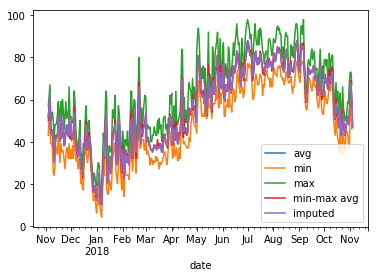

In [64]:
df.loc[pandas.Timestamp("2017-11-04"):].plot()

And that lets us zoom into interesting regions in the data space.

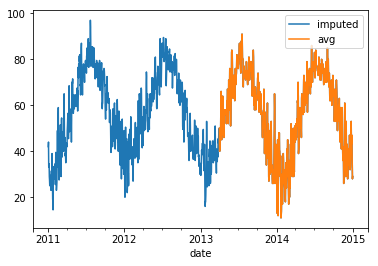

In [72]:
df[["imputed", "avg"]].loc[pandas.Timestamp("2011-01-01"):pandas.Timestamp("2015-01-01")].plot()

Pandas has oodles of statistical functions. Whenever I want to do something, I do a web search to find out what it's named— _somebody's_ asked about it on StackOverflow.

Let's look for local warming! (Not global; this is just Newark.)

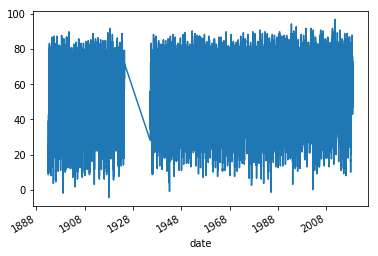

In [74]:
df["imputed"].plot()

Day-to-day variations are drowning out any effect. Can we smooth these data?

Yes. It's called a rolling mean.

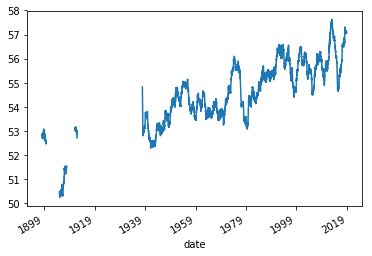

In [79]:
df["imputed"].rolling(3*365).mean().plot()

The input files we've been working with are artificial (one number per line as text). The original file that came from the NCDC was a CSV with redundant information.

In [104]:
df2 = pandas.read_csv("data/newark-temperature.csv")
df2

,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",1893-01-01,NaN,52.0,26.0
1,USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",1893-01-02,NaN,43.0,34.0
2,USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",1893-01-03,NaN,32.0,17.0
3,USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",1893-01-04,NaN,23.0,13.0
4,USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",1893-01-05,NaN,27.0,17.0
5,USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",1893-01-06,NaN,30.0,13.0
6,USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",1893-01-07,NaN,28.0,12.0
7,USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",1893-01-08,NaN,28.0,15.0
8,USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",1893-01-09,NaN,32.0,11.0
9,USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",1893-01-10,NaN,32.0,4.0


The first two columns have only one value because this was a database selection. Pandas's `read_csv` function recognized that the temperature columns are numbers, but not that the date is a date.

In [105]:
df2["DATE"].dtype

dtype('O')

The `'O'` type (object) is for cases when Pandas doesn't recognize the type of a field. In principle, it could be any Python object, but from a CSV file, it's a string.

We can try to read it again, this time providing a hint that this column is supposed to be a date.

In [109]:
df2 = pandas.read_csv("data/newark-temperature.csv", parse_dates=["DATE"])

It looks the same, but now the date is a date.

In [110]:
df2["DATE"].dtype

dtype('<M8[ns]')

We'd like this date column to be the index of the whole table, so we say so.

In [111]:
df2.index = df2["DATE"]

Now we can do the same analysis we did before, but directly on the DataFrame from the CSV file, not by gluing together Series derived from Numpy arrays.

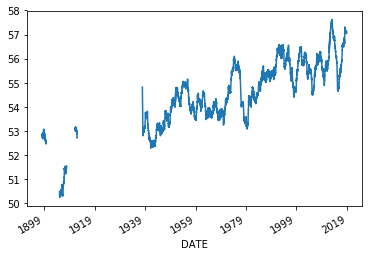

In [112]:
df2["imputed"] = df2["TAVG"].fillna((df2["TMIN"] + df2["TMAX"]) / 2)
df2["imputed"].rolling(3*365).mean().plot()